In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
articles = pd.read_csv('/content/drive/MyDrive/Skils Assessment 2/articles.B2M.csv')
authors = pd.read_csv('/content/drive/MyDrive/Skils Assessment 2/authors.B2M.csv')
paper_counts = pd.read_csv('/content/drive/MyDrive/Skils Assessment 2/paper_counts.csv')
impact_factors = pd.read_csv('/content/drive/MyDrive/Skils Assessment 2/journal if.csv')

<Figure size 1500x1200 with 0 Axes>

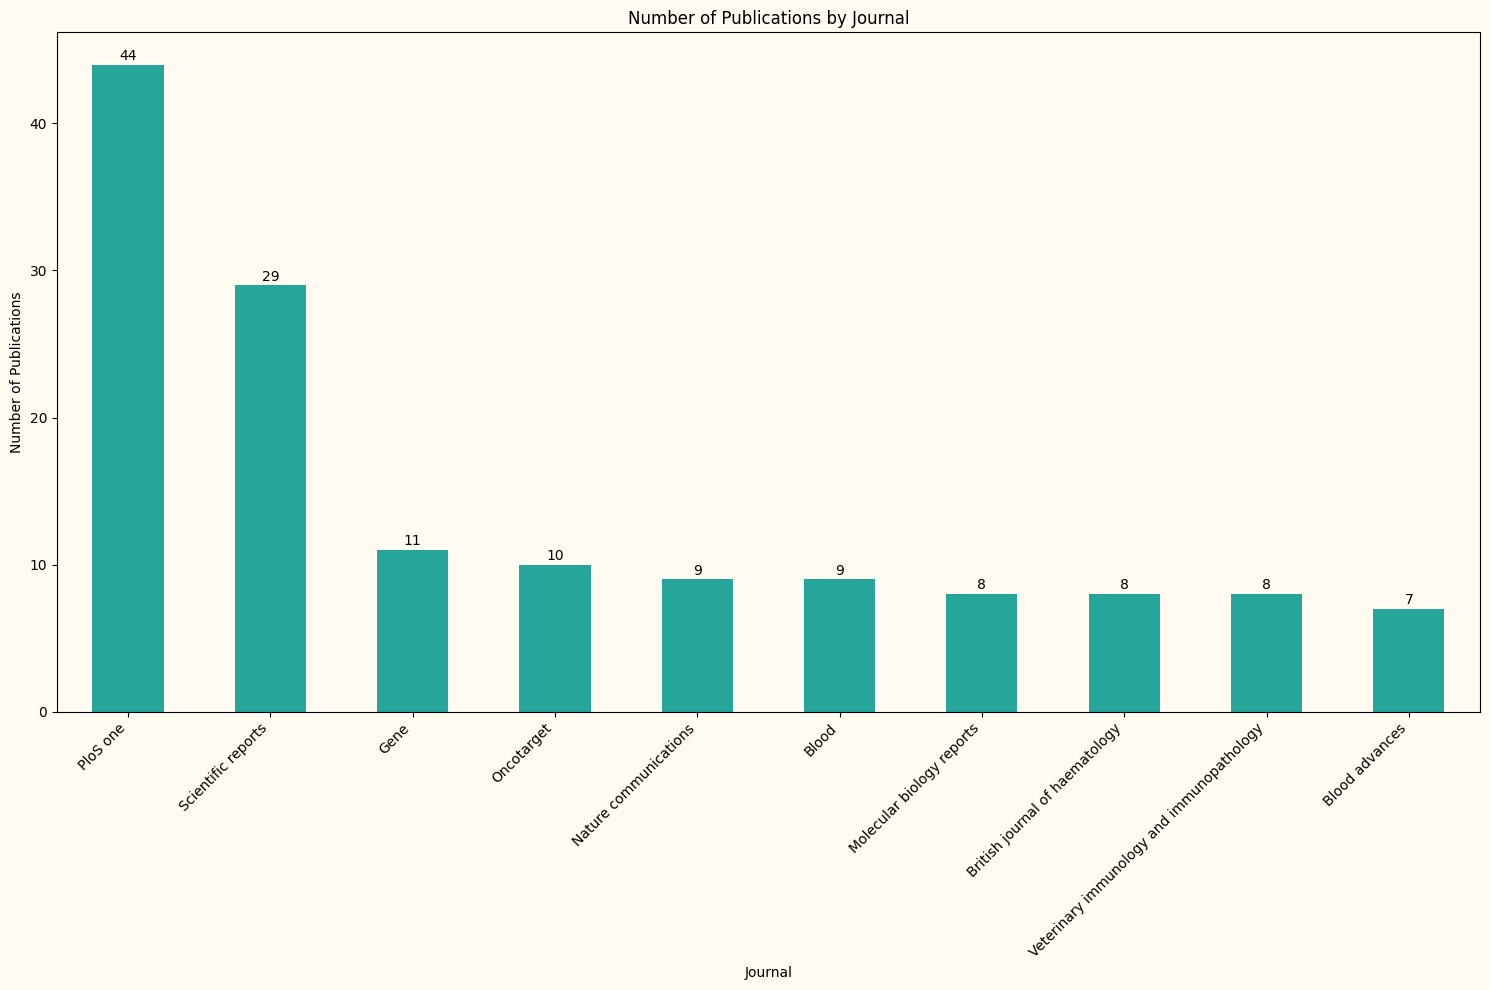

In [ ]:
# Counting the number of publications for each journal
journal_counts = articles['Journal'].value_counts()

# Filtered journals with publication count greater than 6
journal_counts_filtered = journal_counts[journal_counts > 6]

# bar graph to visualize the number of publications by journal
plt.figure(figsize=(15, 12))
fig, ax = plt.subplots(figsize=(15, 10))

# Setting background colors for the figure and axes
fig.set_facecolor('#fffbf0')
ax.set_facecolor('#fffbf0')

# Plotting the bar graph with counts on top
bars = journal_counts_filtered.plot(kind='bar', color='#26a69a')

# Set graph title and labels
plt.title('Number of Publications by Journal')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its count on top
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()


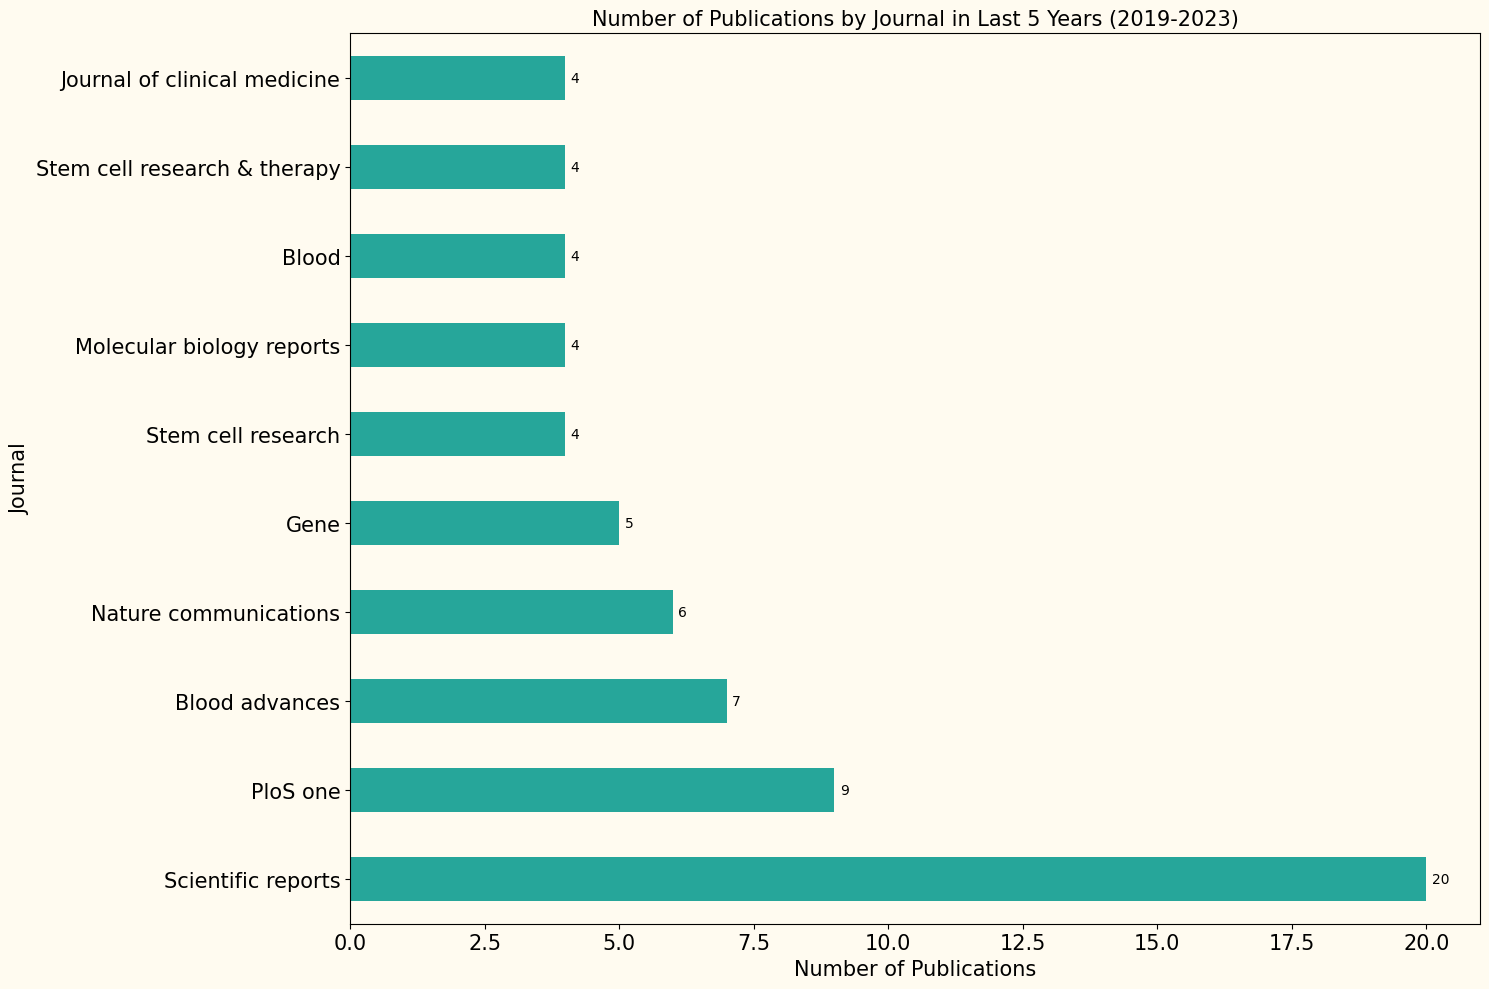

In [ ]:
# Set the starting year for analysis
start_year = 2019

# Define the number of years for analysis
years_for_analysis = 5

# Filtering articles for the last 5 years
df_last_5_years = articles[(articles['Year'] >= start_year) & (articles['Year'] <= start_year + years_for_analysis - 1)]

# Counting the number of publications for each journal in the last 5 years
journal_counts_last_5_years = df_last_5_years['Journal'].value_counts()

# Filter journals with publication count greater than 3
journal_counts_last_5_years = journal_counts_last_5_years[journal_counts_last_5_years > 3]

# horizontal bar graph to visualize the number of publications by journal
fig, ax = plt.subplots(figsize=(15, 10))

# Set background colors for the figure and axes
fig.set_facecolor('#fffbf0')
ax.set_facecolor('#fffbf0')

# Plot the horizontal bar graph with counts on the left
bars = journal_counts_last_5_years.plot(kind='barh', color='#26a69a')

# Set graph title and labels
plt.title(f'Number of Publications by Journal in Last 5 Years (2019-2023)', fontsize=15)
plt.ylabel('Journal', fontsize=15)
plt.xlabel('Number of Publications', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Annotate each bar with its count on the left
for bar in bars.patches:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, round(xval, 1), ha='left', va='center')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()


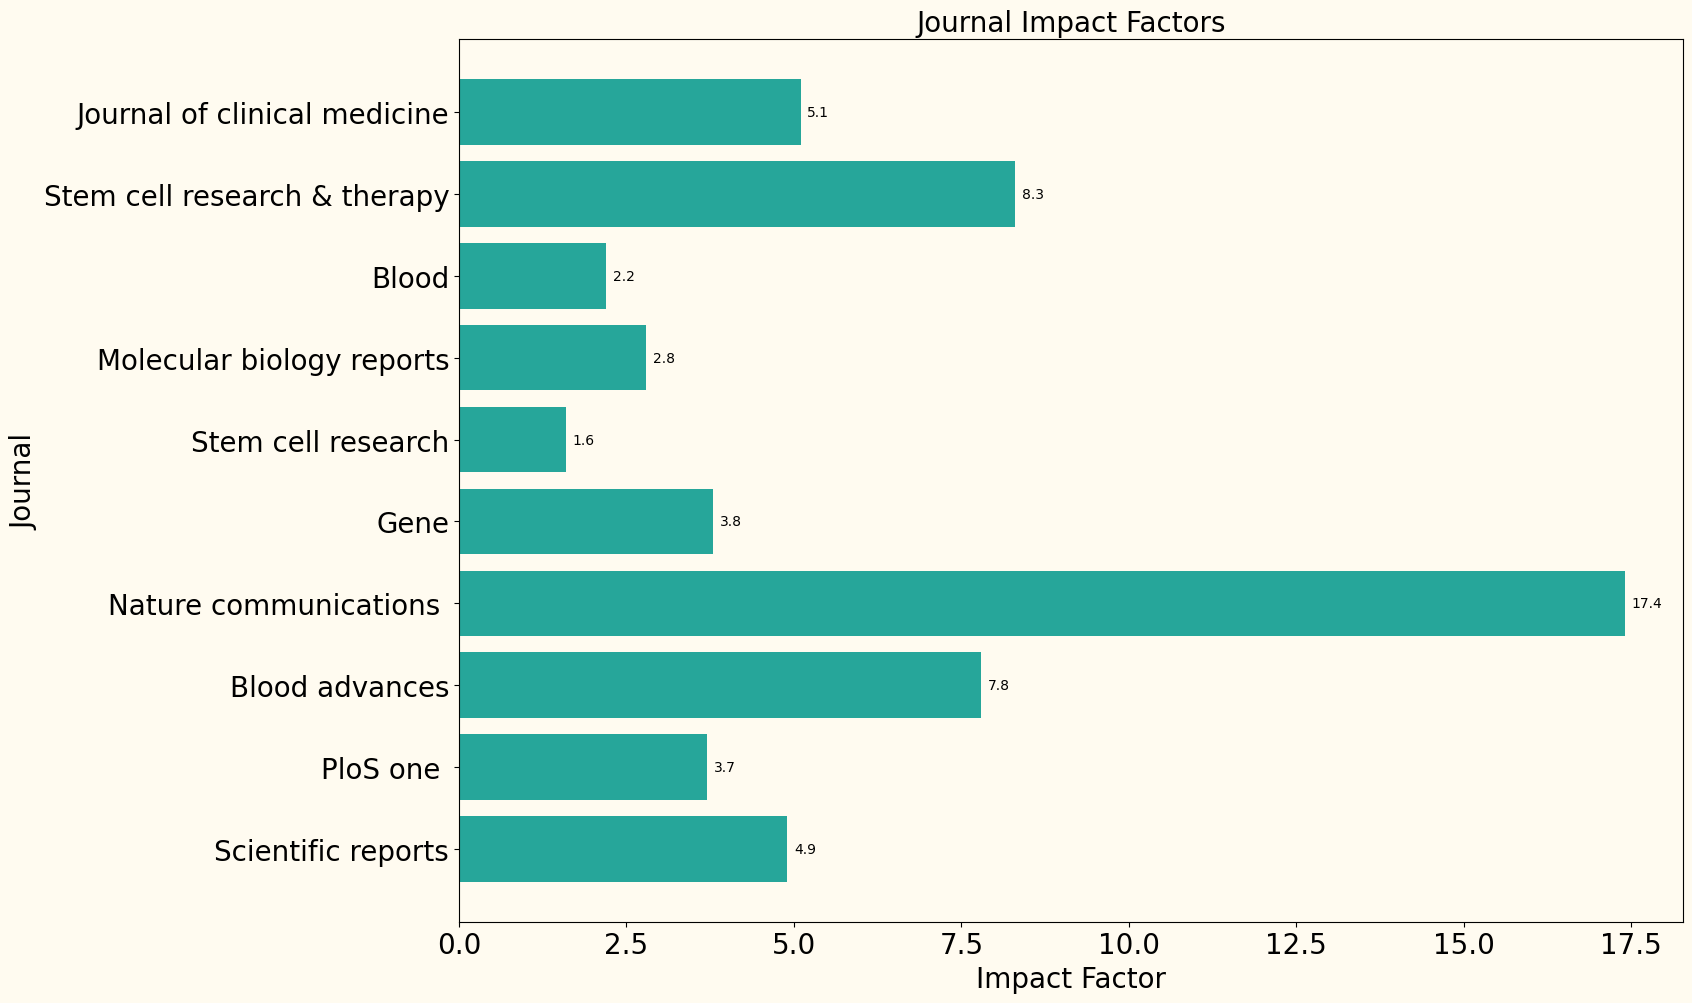

In [ ]:
# Creating a subplot with a specified size
fig, ax = plt.subplots(figsize=(15, 10))

# Set background colors for the figure and axes
fig.set_facecolor('#fffbf0')
ax.set_facecolor('#fffbf0')

# horizontal bar graph to display impact factors by journal
bars = plt.barh(impact_factors['Journal'], impact_factors['Impact Factor'], color='#26a69a')

# Setting labels and title for the graph
plt.xlabel('Impact Factor', fontsize=20)
plt.ylabel('Journal', fontsize=20)
plt.title('Journal Impact Factors', fontsize=20)

# Adjust layout and font sizes
plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Annotate each bar with its value on the left
for bar in bars.patches:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, round(xval, 1), ha='left', va='center')

# Display the graph
plt.show()


In [ ]:
# we used TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer to convert text data into numerical format.
# it helps us understand the importance of each word in a document relative to a collection of documents (corpus).

# TF-IDF consists of two parts:
# 1. Term Frequency (TF): It measures how often a word appears in a document.
# 2. Inverse Document Frequency (IDF): It measures how unique a word is across multiple documents.

# TF-IDF Vectorizer transforms the abstracts of scientific articles into numerical vectors, capturing the importance of each word


# Creating a TfidfVectorizer with English stop words and case conversion
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform abstracts to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_last_5_years['Abstract'])

# feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Creating a DataFrame from the TF-IDF matrix with feature names as columns
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Sum the TF-IDF values for each term across all abstracts
term_importance = tfidf_df.sum(axis=0)

# # To get the frequency count for each term
# term_frequency = df_last_5_years['Abstract'].apply(lambda x: pd.Series(x.split())).stack().value_counts()

# term_stats_df = pd.DataFrame({
#     'TF-IDF': term_importance,
#     'Frequency': term_frequency
# })

# sorted_terms = term_stats_df.sort_values(by='TF-IDF', ascending=False)


# Sorting the terms by TF-IDF values in descending order
sorted_terms = term_importance.sort_values(ascending=False)

# top 50 terms and converting them to a dictionary
top_technical_terms = sorted_terms.head(50).to_dict()

#sorted_terms = term_importance.sort_values(ascending=False)

#top_technical_terms = sorted_terms.head(20)
top_technical_terms




{'genes': 9.439510966610648,
 'cells': 8.970853564001398,
 'b2m': 8.787109196110048,
 'cell': 8.291773537198793,
 'patients': 7.705324887490901,
 'expression': 7.102419559006374,
 'immune': 6.8516071950007955,
 'gene': 6.5425798252805185,
 'reference': 6.110472825333649,
 'hla': 6.0569682914128755,
 'cancer': 4.852975809340803,
 'tumor': 4.6617282962272615,
 'study': 4.5462631719108035,
 'microglobulin': 4.250248047011071,
 'pd': 4.1765367213679125,
 'high': 4.066646191444004,
 'analysis': 4.006285154675793,
 'associated': 3.968595398084387,
 'using': 3.9126565931043924,
 'protein': 3.865816599759232,
 'mutations': 3.820235138428765,
 'disease': 3.662175760317604,
 'human': 3.654639934473354,
 'beta': 3.560143751978223,
 'proteins': 3.473054785440355,
 'class': 3.4482151799699676,
 'based': 3.4112400382907673,
 'clinical': 3.273944460126116,
 'treatment': 3.253900255551818,
 'mhc': 3.1647730882234693,
 'kidney': 3.130056707493503,
 'related': 3.044539627410103,
 'levels': 3.00676932595

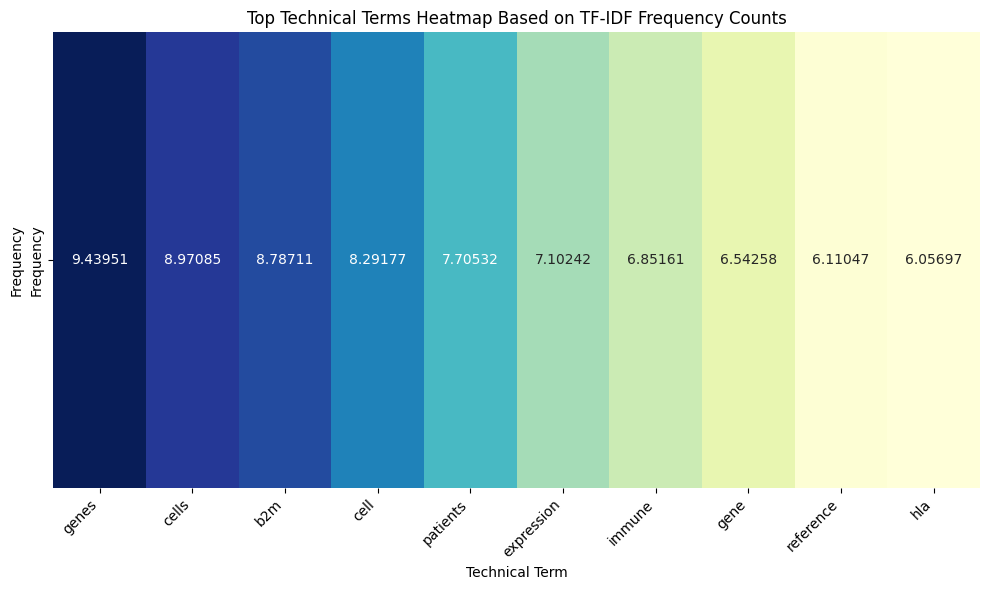

In [ ]:
# Defining the number of top terms to display
num_terms_to_display = 10

# Selecting the top technical terms based on TF-IDF values
top_technical_terms = sorted_terms.head(num_terms_to_display)

# Creating a DataFrame from the top terms with 'Frequency' as the column name
heatmap_data = pd.DataFrame(top_technical_terms, columns=['Frequency'])

# Creating a heatmap using seaborn library
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.transpose(), cmap='YlGnBu', annot=True, fmt='g', cbar=False)
plt.title('Top Technical Terms Heatmap Based on TF-IDF Frequency Counts')
plt.xlabel('Technical Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [ ]:
#Wordcloud for last 5 years
# wordcloud = WordCloud(width=800, height=400, background_color='#fffbf0', color_func=lambda *args, **kwargs: '#26a69a').generate_from_frequencies(top_technical_terms)

# fig = plt.figure()
# ax = plt.axes()
# plt.imshow(wordcloud, interpolation='bilinear')
# ax.set_axis_off()
# ax.patch.set_facecolor('#fffbf0')
# fig.patch.set_facecolor('#fffbf0')
# plt.tight_layout(pad=0)

# plt.savefig('/content/drive/MyDrive/Skils Assessment 2/top technical terms last 5 years', bbox_inches='tight')

In [ ]:
#Wordcloud for last 5 years in ppt color
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_technical_terms)
# fig = plt.figure()
# ax = plt.axes()
# plt.imshow(wordcloud, interpolation='bilinear')
# ax.set_axis_off()
# plt.tight_layout(pad=0)

# plt.savefig('/content/drive/MyDrive/Skils Assessment 2/top technical terms last 5 years color', bbox_inches='tight')

In [ ]:
#bar plot for last 5 years terminology top 10
# num_terms_to_display = 10

# top_technical_terms = sorted_terms.head(num_terms_to_display)

# plt.figure(figsize=(12, 8))

# top_technical_terms.plot(kind='bar', color='#26a69a', fontsize=14)
# plt.title('Top Technical Terms Based on Frequency Counts', fontsize=18)
# plt.xlabel('Technical Term', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# plt.show()


In [ ]:
# df_last_5_years = articles[(articles['Year'] >= 2019) & (articles['Year'] <= 2023)]

# tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# tfidf_matrix = tfidf_vectorizer.fit_transform(df_last_5_years['Abstract'])

# feature_names = tfidf_vectorizer.get_feature_names_out()

# tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# term_importance = tfidf_df.sum(axis=0)

# # # To get the frequency count for each term
# # term_frequency = df_last_5_years['Abstract'].apply(lambda x: pd.Series(x.split())).stack().value_counts()

# # term_stats_df = pd.DataFrame({
# #     'TF-IDF': term_importance,
# #     'Frequency': term_frequency
# # })

# # sorted_terms = term_stats_df.sort_values(by='TF-IDF', ascending=False)
# sorted_terms = term_importance.sort_values(ascending=False)

# top_technical_terms = sorted_terms.head(20).to_dict()

# #sorted_terms = term_importance.sort_values(ascending=False)

# #top_technical_terms = sorted_terms.head(20)
# print(top_technical_terms)


# wordcloud = WordCloud(width=800, height=400, background_color='#fffbf0', color_func=lambda *args, **kwargs: '#26a69a').generate_from_frequencies(top_technical_terms)

# fig = plt.figure()
# ax = plt.axes()
# plt.imshow(wordcloud, interpolation='bilinear')
# ax.set_axis_off()
# ax.patch.set_facecolor('#fffbf0')
# fig.patch.set_facecolor('#fffbf0')
# plt.tight_layout(pad=0)

# plt.savefig('/content/drive/MyDrive/Skils Assessment 2/top technical terms last 5 years_20', bbox_inches='tight')


# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_technical_terms)
# fig = plt.figure()
# ax = plt.axes()
# plt.imshow(wordcloud, interpolation='bilinear')
# ax.set_axis_off()
# plt.tight_layout(pad=0)

# plt.savefig('/content/drive/MyDrive/Skils Assessment 2/top technical terms last 5 years color_20', bbox_inches='tight')